### ДЗ 14. RNN 

Для IMDB датасету зробити класифікацію на основі RNN

https://keras.io/api/datasets/imdb/

https://pytorch.org/text/stable/datasets.html#imdb

In [19]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

from scipy import stats
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense,Activation
import re
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


In [2]:
df = pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
#(X_train,Y_train),(X_test,Y_test) = imdb.load_data(path="imdb.npz",num_words=None,skip_top=0,maxlen=None,start_char=1,seed=30,oov_char=2,index_from=3)

num_words = 15000
(X_train,Y_train),(X_test,Y_test) = imdb.load_data(num_words=num_words)

######################################################################################

maxlen=130
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)


print("General information:")
print("Type: ", type(X_train))
print("Type: ", type(Y_train))
print("X train shape: ",X_train.shape)
print("Y train shape: ",Y_train.shape)
print("Y train values: ",np.unique(Y_train))
print("Y test values: ",np.unique(Y_test))

unique,counts = np.unique(Y_train,return_counts=True)
print("Y train distribution: ", dict(zip(unique,counts)))

unique,counts = np.unique(Y_test,return_counts=True)
print("Y test distribution: ", dict(zip(unique,counts)))

17464789/17464789 [==============================] - 0s 0us/step
General information:
Type:  <class 'numpy.ndarray'>
Type:  <class 'numpy.ndarray'>
X train shape:  (25000, 130)
Y train shape:  (25000,)
Y train values:  [0 1]
Y test values:  [0 1]
Y train distribution:  {0: 12500, 1: 12500}
Y test distribution:  {0: 12500, 1: 12500}


In [4]:
# number or words
word_index = imdb.get_word_index()
print(type(word_index))
print("length of word_index: ",len(word_index))

1641221/1641221 [==============================] - 0s 0us/step
<class 'dict'>
length of word_index:  88584


In [5]:
for keys,values in word_index.items():
    if values == 1:
        print(keys)

the


In [6]:
def whatItSay(index=24):
    reverse_index = dict([(value,key) for (key,value) in word_index.items()])
    decode_review = " ".join([reverse_index.get(i-3, "!") for i in X_train[index]])
    print(decode_review)
    print(Y_train[index])
    return decode_review

#decoded_review = whatItSay()
decoded_review = whatItSay(5)

! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! begins better than it ends funny that the russian submarine crew ! all other actors it's like those scenes where documentary shots br br spoiler part the message ! was contrary to the whole story it just does not ! br br
0


In [7]:
print(X_train[5])
decoded_review = whatItSay(5)

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    1  778  128   74   12  630  163   15    4 1766 7982
 1051    2   32   85  156   45   40  148  139  121  664  665   10   10
 1361  173    4  749    2   16 3804    8    4  226   65   12   43  127
   24    2   10   10]
! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! begins better than it ends funny that the russian submarine crew ! all other actors it's like those scenes where documentary shots br br spoiler part the message !

### RNN Model definition

In [17]:
# Simple model

rnn = Sequential()

rnn.add(Embedding(num_words,32,input_length =len(X_train[0]))) # num_words=15000
rnn.add(SimpleRNN(16,input_shape = (num_words,maxlen), return_sequences=False,activation="relu"))
rnn.add(Dense(1)) #flatten
rnn.add(Activation("sigmoid")) #using sigmoid for binary classification
print(rnn.summary())
rnn.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 130, 32)           480000    
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 16)                784       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
 activation_5 (Activation)   (None, 1)                 0         
                                                                 
Total params: 480,801
Trainable params: 480,801
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
# Simple model 2

rnn2 = Sequential()

rnn2.add(Embedding(num_words,32,input_length =len(X_train[0]))) # num_words=15000
rnn2.add(SimpleRNN(200,input_shape = (num_words,maxlen), return_sequences=False,activation="relu"))
rnn2.add(Dense(1))
rnn2.add(Activation("sigmoid")) 
print(rnn2.summary())
rnn2.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 130, 32)           480000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 200)               46600     
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 526,801
Trainable params: 526,801
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
# RNN model 3

from keras.layers import SimpleRNN, Activation, Dense, Dropout, Input, Embedding, LSTM
from keras.models import Model

def RNNmodel():
    inputs = Input(name='inputs',shape=[maxlen])
    layer = Embedding(num_words,50,input_length=maxlen)(inputs)
    layer = LSTM(32)(layer)
    layer = Dense(256,name='FC1',activation='relu')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

rnn3 = RNNmodel()
rnn3.summary()
rnn3.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy',tf.keras.metrics.Precision()])


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 130)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 130, 50)           750000    
                                                                 
 lstm (LSTM)                 (None, 32)                10624     
                                                                 
 FC1 (Dense)                 (None, 256)               8448      
                                                                 
 activation_2 (Activation)   (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257   

In [11]:
# RNN model 4

from tensorflow.keras import layers, models, optimizers

def rnn4_lstm():
    # Add an Input Layer
    input_layer = layers.Input((len(X_train[0]), ))

    # Add the word embedding Layer
    embedding_layer = layers.Embedding(len(word_index) + 1, 300, trainable=False)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)

    # Add the LSTM Layer
    lstm_layer = layers.LSTM(100)(embedding_layer)

    # Add the output Layers
    output_layer1 = layers.Dense(50, activation="relu")(lstm_layer)
    output_layer1 = layers.Dropout(0.25)(output_layer1)
    output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)

    # Compile the model
    model = models.Model(inputs=input_layer, outputs=output_layer2)
    
    return model

rnn4 = rnn4_lstm()
rnn4.summary()
rnn4.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy',metrics=['accuracy',tf.keras.metrics.Precision()])


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 130)]             0         
                                                                 
 embedding_3 (Embedding)     (None, 130, 300)          26575500  
                                                                 
 spatial_dropout1d (SpatialD  (None, 130, 300)         0         
 ropout1D)                                                       
                                                                 
 lstm_1 (LSTM)               (None, 100)               160400    
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                           

###  RNN models training

Epoch 1/20
196/196 [==============================] - 58s 266ms/step - loss: 0.6443 - accuracy: 0.6335 - val_loss: 0.5823 - val_accuracy: 0.7046
Epoch 2/20
196/196 [==============================] - 39s 197ms/step - loss: 0.5145 - accuracy: 0.7573 - val_loss: 0.4543 - val_accuracy: 0.7992
Epoch 3/20
196/196 [==============================] - 35s 178ms/step - loss: 0.4310 - accuracy: 0.8080 - val_loss: 0.4322 - val_accuracy: 0.8104
Epoch 4/20
196/196 [==============================] - 36s 182ms/step - loss: 0.3783 - accuracy: 0.8359 - val_loss: 0.3877 - val_accuracy: 0.8254
Epoch 5/20
196/196 [==============================] - 31s 160ms/step - loss: 0.3260 - accuracy: 0.8638 - val_loss: 0.3805 - val_accuracy: 0.8336
Epoch 6/20
196/196 [==============================] - 31s 160ms/step - loss: 0.3067 - accuracy: 0.8806 - val_loss: 0.4268 - val_accuracy: 0.8208
Epoch 7/20
196/196 [==============================] - 30s 154ms/step - loss: 0.2629 - accuracy: 0.8958 - val_loss: 0.3768 - val_ac

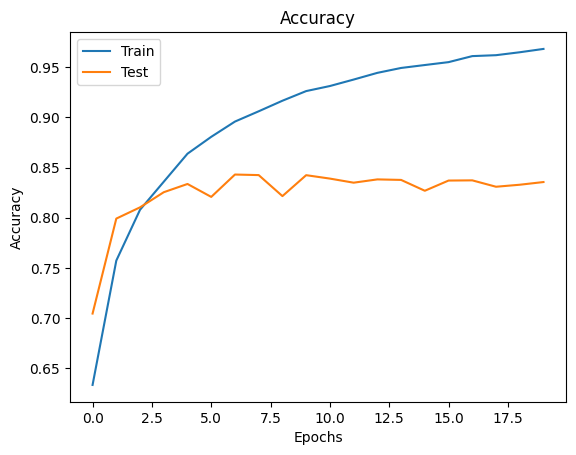

In [12]:
history = rnn.fit(X_train,Y_train,validation_data = (X_test,Y_test),epochs = 20,batch_size=128,verbose = 1)
##################################################################################################
plt.figure()
plt.plot(history.history["accuracy"],label="Train");
plt.plot(history.history["val_accuracy"],label="Test");
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show();

Epoch 1/20
196/196 [==============================] - 63s 311ms/step - loss: 0.6497 - accuracy: 0.6061 - val_loss: 0.6167 - val_accuracy: 0.5984
Epoch 2/20
196/196 [==============================] - 45s 230ms/step - loss: 0.4623 - accuracy: 0.7824 - val_loss: 0.3659 - val_accuracy: 0.8440
Epoch 3/20
196/196 [==============================] - 39s 201ms/step - loss: 0.2841 - accuracy: 0.8847 - val_loss: 0.3689 - val_accuracy: 0.8528
Epoch 4/20
196/196 [==============================] - 33s 169ms/step - loss: 0.2801 - accuracy: 0.8872 - val_loss: 0.5449 - val_accuracy: 0.7890
Epoch 5/20
196/196 [==============================] - 35s 181ms/step - loss: 0.3755 - accuracy: 0.8435 - val_loss: 0.4870 - val_accuracy: 0.8000
Epoch 6/20
196/196 [==============================] - 35s 179ms/step - loss: 0.2384 - accuracy: 0.9079 - val_loss: 0.4529 - val_accuracy: 0.8045
Epoch 7/20
196/196 [==============================] - 33s 169ms/step - loss: 0.1836 - accuracy: 0.9296 - val_loss: 0.4674 - val_ac

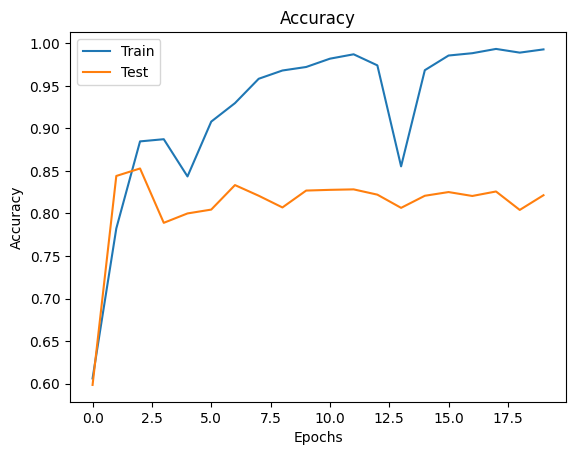

In [13]:
history = rnn2.fit(X_train,Y_train,validation_data = (X_test,Y_test),epochs = 20,batch_size=128,verbose = 1)
##################################################################################################
plt.figure()
plt.plot(history.history["accuracy"],label="Train");
plt.plot(history.history["val_accuracy"],label="Test");
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show();

Epoch 1/20
196/196 [==============================] - 26s 114ms/step - loss: 0.5826 - accuracy: 0.6660 - precision: 0.6867 - val_loss: 0.4048 - val_accuracy: 0.8213 - val_precision: 0.8890
Epoch 2/20
196/196 [==============================] - 15s 74ms/step - loss: 0.3327 - accuracy: 0.8599 - precision: 0.8573 - val_loss: 0.3472 - val_accuracy: 0.8505 - val_precision: 0.9034
Epoch 3/20
196/196 [==============================] - 10s 50ms/step - loss: 0.2600 - accuracy: 0.8971 - precision: 0.8946 - val_loss: 0.4680 - val_accuracy: 0.8115 - val_precision: 0.9441
Epoch 4/20
196/196 [==============================] - 6s 33ms/step - loss: 0.2210 - accuracy: 0.9167 - precision: 0.9143 - val_loss: 0.3317 - val_accuracy: 0.8574 - val_precision: 0.8859
Epoch 5/20
196/196 [==============================] - 6s 30ms/step - loss: 0.1893 - accuracy: 0.9300 - precision: 0.9295 - val_loss: 0.3577 - val_accuracy: 0.8612 - val_precision: 0.8746
Epoch 6/20
196/196 [==============================] - 5s 26ms

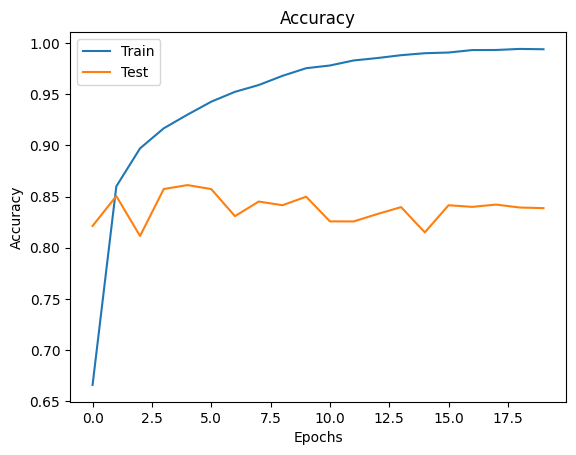

In [14]:
history = rnn3.fit(X_train,Y_train,validation_data = (X_test,Y_test),epochs = 20,batch_size=128,verbose = 1)
##################################################################################################
plt.figure()
plt.plot(history.history["accuracy"],label="Train");
plt.plot(history.history["val_accuracy"],label="Test");
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show();

Epoch 1/40
196/196 [==============================] - 4s 19ms/step - loss: 0.3778 - accuracy: 0.8247 - precision_1: 0.8263 - val_loss: 0.4006 - val_accuracy: 0.8162 - val_precision_1: 0.8045
Epoch 2/40
196/196 [==============================] - 4s 18ms/step - loss: 0.3676 - accuracy: 0.8307 - precision_1: 0.8321 - val_loss: 0.4248 - val_accuracy: 0.8090 - val_precision_1: 0.7657
Epoch 3/40
196/196 [==============================] - 3s 18ms/step - loss: 0.3631 - accuracy: 0.8331 - precision_1: 0.8323 - val_loss: 0.4010 - val_accuracy: 0.8152 - val_precision_1: 0.7843
Epoch 4/40
196/196 [==============================] - 3s 17ms/step - loss: 0.3607 - accuracy: 0.8367 - precision_1: 0.8364 - val_loss: 0.3885 - val_accuracy: 0.8227 - val_precision_1: 0.8113
Epoch 5/40
196/196 [==============================] - 3s 17ms/step - loss: 0.3512 - accuracy: 0.8377 - precision_1: 0.8373 - val_loss: 0.4245 - val_accuracy: 0.8012 - val_precision_1: 0.7464
Epoch 6/40
196/196 [=========================

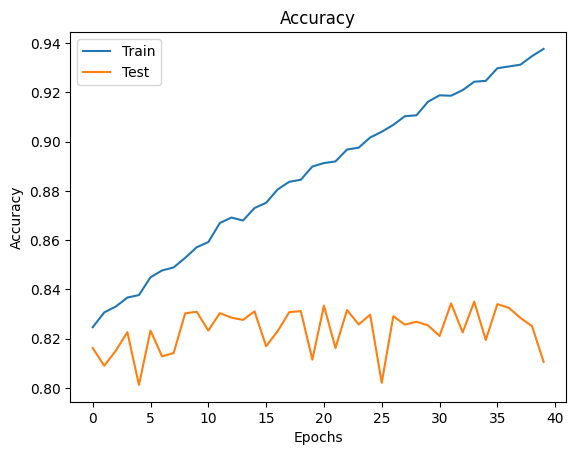

In [20]:
history5 = rnn4.fit(X_train,Y_train,validation_data = (X_test,Y_test),epochs = 40,batch_size=128,verbose = 1)
##################################################################################################
plt.figure()
plt.plot(history5.history["accuracy"],label="Train");
plt.plot(history5.history["val_accuracy"],label="Test");
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show();

## Conclusion

- Four RNN models were tested using the same test/train datasets
- all models do not provide good classification accuracy
- max accuracy was observed during training model 3